In [11]:
#we're going to use a dataset of handwritten digits for this example

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np 
import matplotlib.pyplot as plt


Image Data Shape (1797, 64)
Label Data Shape (1797,)


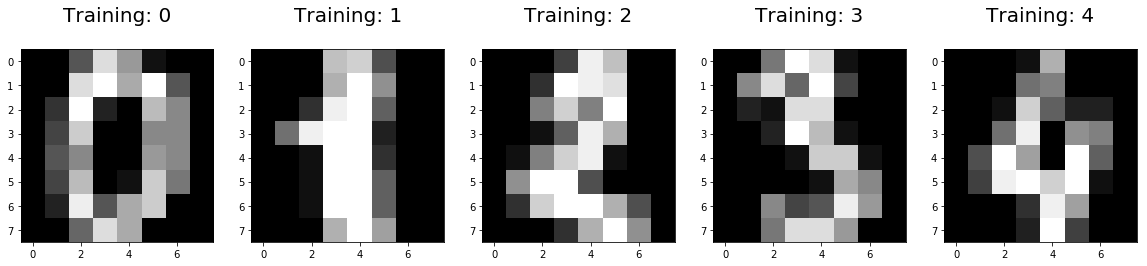

In [9]:
#In here we're basically just examining the data

#load the data
digits = load_digits()


# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [13]:
#Here we're going to split our data into two sections, one for training the model, and one for testing it
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

#Now we create an instance of the model (logistic regression)
#below you'll see some output, this is because the LogisticRegression() class is taking default parameters since none are provided
logisticRegr = LogisticRegression()

#and now we fit the model to our data, using sklearn's inbuilt process (MLE)
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
#now we have a model, so we can make predictions

# each of these return a NumPy Array

# Predict for One Observation (image)
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

#predict for multiple observations
print(logisticRegr.predict(x_test[0:10]))

#predict for entire test set
predictions = logisticRegr.predict(x_test)

[2]
[2 8 2 6 6 7 1 9 8 5]


In [19]:
#we can score our model based on how well it gets the data
#this scores by taking (#of correct predictions) / (# of datapoints)

score = 100 * logisticRegr.score(x_test, y_test)
print("%.2f" % round(score,2) + "% Accuracy")

95.33% Accuracy


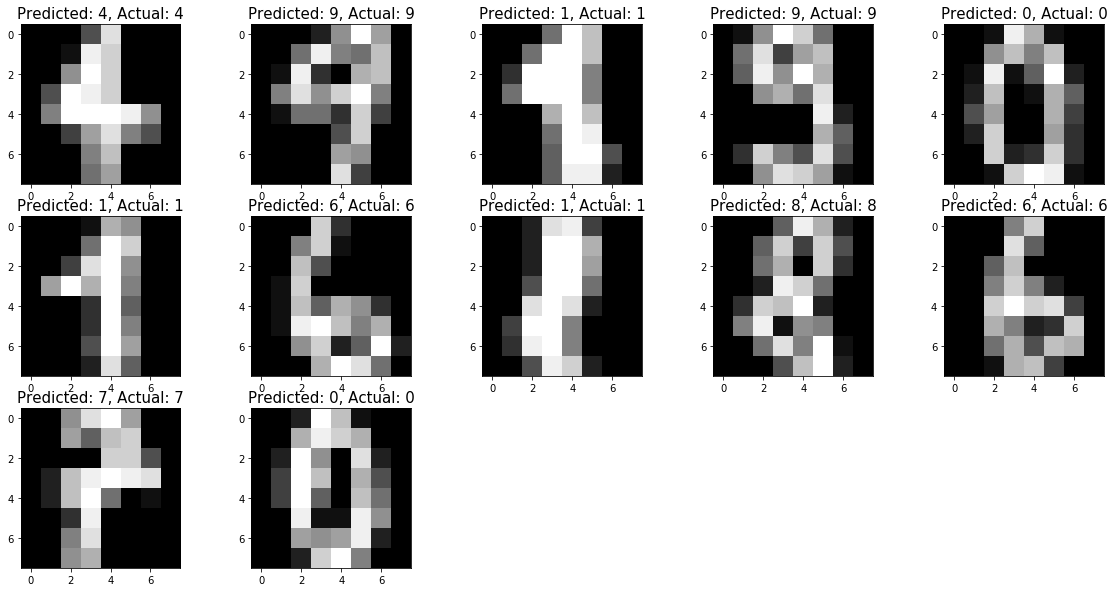

In [52]:
import random
index = 0
num_to_graph = 12
classifiedIndex = []
for label, predict in zip(y_test, predictions):
    if index < num_to_graph: 
        classifiedIndex.append(int(random.random() * x_test.shape[0]))
        index += 1

plt.figure(figsize=(20,4 * num_to_graph//5 + 1))
for plotIndex, index in enumerate(classifiedIndex[0:num_to_graph]):
    plt.subplot(num_to_graph//5 + 1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[index], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[index], y_test[index]), fontsize = 15)